# 웹 기초와 크롤러 만들기

In [19]:
from urllib.request import urlopen

b'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\
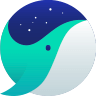
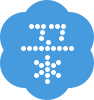

In [20]:
url = "http://www.naver.com/"
html = urlopen(url)

print(html.read())

In [21]:
import bs4
html_str = "<html><div>hello</div></html>"
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

print(type(bs_obj))
print(bs_obj)
print(bs_obj.find("div"))

<class 'bs4.BeautifulSoup'>
<html><div>hello</div></html>
<div>hello</div>


In [22]:
import bs4

html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        <ul>
    </body>
<html>
"""
bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

ul = bs_obj.find("ul") # ul 태그를 뽑아냄
li = ul.find("li") # ul에서 li 태그를 뽑아냄
print(li.text) # .text 속성을 뽑아냄

hello


- .find( ) : 조건에 해당하는 첫 번째 태그를 리턴
- .findAll( ) : 조건에 해당하는 모든 요소를 리스트 [ ] 형태로 추출

In [23]:
import bs4

html_str = """
<html>
    <body>
        <ul>
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

ul = bs_obj.find("ul")
lis = ul.findAll("li") # findAll( )은 리스트 형태로 리턴
print(lis[1])
print(lis[1].text)

<li>bye</li>
bye


In [24]:
# 태그와 속성, 속성값

<ul class="greet">

# <ul> -> 태그
# class -> 속성
# "greet" -> 속성값

SyntaxError: invalid syntax (<ipython-input-24-7ead3aee04e2>, line 3)

In [25]:
import bs4

html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

ul = bs_obj.find("ul")
print(ul)

<ul class="greet">
<li>hello</li>
<li>bye</li>
<li>welcome</li>
</ul>


### class 속성 이용해 데이터 뽑기

In [26]:
import bs4

html_str = """
<html>
    <body>
        <ul class="greet">
            <li>hello</li>
            <li>bye</li>
            <li>welcome</li>
        </ul>
        <ul class="reply">
            <li>ok</li>
            <li>no</li>
            <li>sure</li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")

ul = bs_obj.find("ul", {"class":"reply"}) #class 속성 이용 
print(ul)

<ul class="reply">
<li>ok</li>
<li>no</li>
<li>sure</li>
</ul>


In [27]:
import bs4

html_str = """
<html>
    <body>
        <ul class="ko">
            <li>
                <a href="https://www.naver.com/">네이버</a>
            </li>
            <li>
                <a href="https://www.daum.net/">다음</a>
            </li>
        </ul>
        <ul class="sns">
            <li>
                <a href="https://www.google.com/">구글</a>
            </li>
            <li>
                <a href="https://www.facebook.com/">페이스북</a>
            </li>
        </ul>
    </body>
</html>
"""

bs_obj = bs4.BeautifulSoup(html_str, "html.parser")
atag = bs_obj.find("a") 
print(atag)
print(atag['href']) #속성값 뽑기

<a href="https://www.naver.com/">네이버</a>
https://www.naver.com/


## 네이버에서 특정 글자 추출하기

b'\n<!doctype html>                <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\xa9\x94\xec\x9d\xb8\xec\x97\x90\xec\x84\x9c \xeb\x8b\xa4\xec\x96\x91\xed\x95\x9c \xec\xa0\x95\xeb\xb3\xb4\xec\x99\x80 \xec\x9c\xa0\xec\x9a\xa9\xed\x95\x9c \xec\xbb\xa8\xed\x85\x90\xec\xb8\xa0\xeb\xa5\xbc \xeb\xa7\x8c\xeb\x82\x98 \xeb\xb3\xb4\xec\x84\xb8\xec\x9a\x94"/> <meta property="og:title" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="\xeb\x84\xa4\xec\x9d\xb4\xeb\xb2\x84 \xeb\
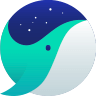
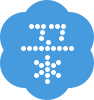

In [28]:
# urllib로 네이버 첫 페이지 데이터 받아오기

import urllib.request

url = "https://www.naver.com/"
html = urllib.request.urlopen(url)
# 네이버 첫 페이지를 호출한 데이터가 문자열 형태로 html 이라는 변수 안에 들어감

print(html.read( ))


<!DOCTYPE html>
 <html data-dark="false" lang="ko"> <head> <meta charset="utf-8"/> <title>NAVER</title> <meta content="IE=edge" http-equiv="X-UA-Compatible"/> <meta content="width=1190" name="viewport"/> <meta content="NAVER" name="apple-mobile-web-app-title"> <meta content="index,nofollow" name="robots"> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="description"> <meta content="네이버" property="og:title"/> <meta content="https://www.naver.com/" property="og:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" property="og:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" property="og:description"> <meta content="summary" name="twitter:card"/> <meta content="" name="twitter:title"/> <meta content="https://www.naver.com/" name="twitter:url"/> <meta content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png" name="twitter:image"/> <meta content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요" name="twitter:de
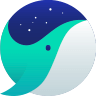
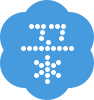

In [38]:
# 뷰티풀솝에 데이터 넣기

import urllib.request
import bs4

url = "http://www.naver.com/"
html = urllib.request.urlopen(url)

bs_obj = bs4.BeautifulSoup(html, "html.parser")

print(bs_obj)

In [39]:
bs_obj = bs4.BeautifulSoup(html, "html.parser") # (받은 텍스트 , 텍스트를 파싱할 파서)

In [43]:
import urllib.request
import bs4

url = "https://www.ilbe.com/list/celeb/" #일베 걸그룹/연예인 갤러리
html = urllib.request.urlopen(url)

bs_obj = bs4.BeautifulSoup(html, "html.parser")

ilbe_celeb = bs_obj.find("span" , {"class":"title"})
first_a = ilbe_celeb.find("a")

print(first_a.text)



걸그룹 게시판 공지사항 [친목 ㄴㄴ, 네임드화 ㄴㄴ, 고소드립 ㄴㄴ]
